# EDA
### Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import seaborn as sns
import plotly.express as px
import pickle as pkl

dataset = "male_players (legacy)_23"
dataset = "female_players_23"
df = pd.read_csv('Data/Preprocessed/Clean_'+dataset+'.csv')

print(len(df))

In [ ]:
# print non object columns sorted alphabetically
print(sorted(df.select_dtypes(exclude=['object']).columns))

<Figure size 1200x3200 with 0 Axes>

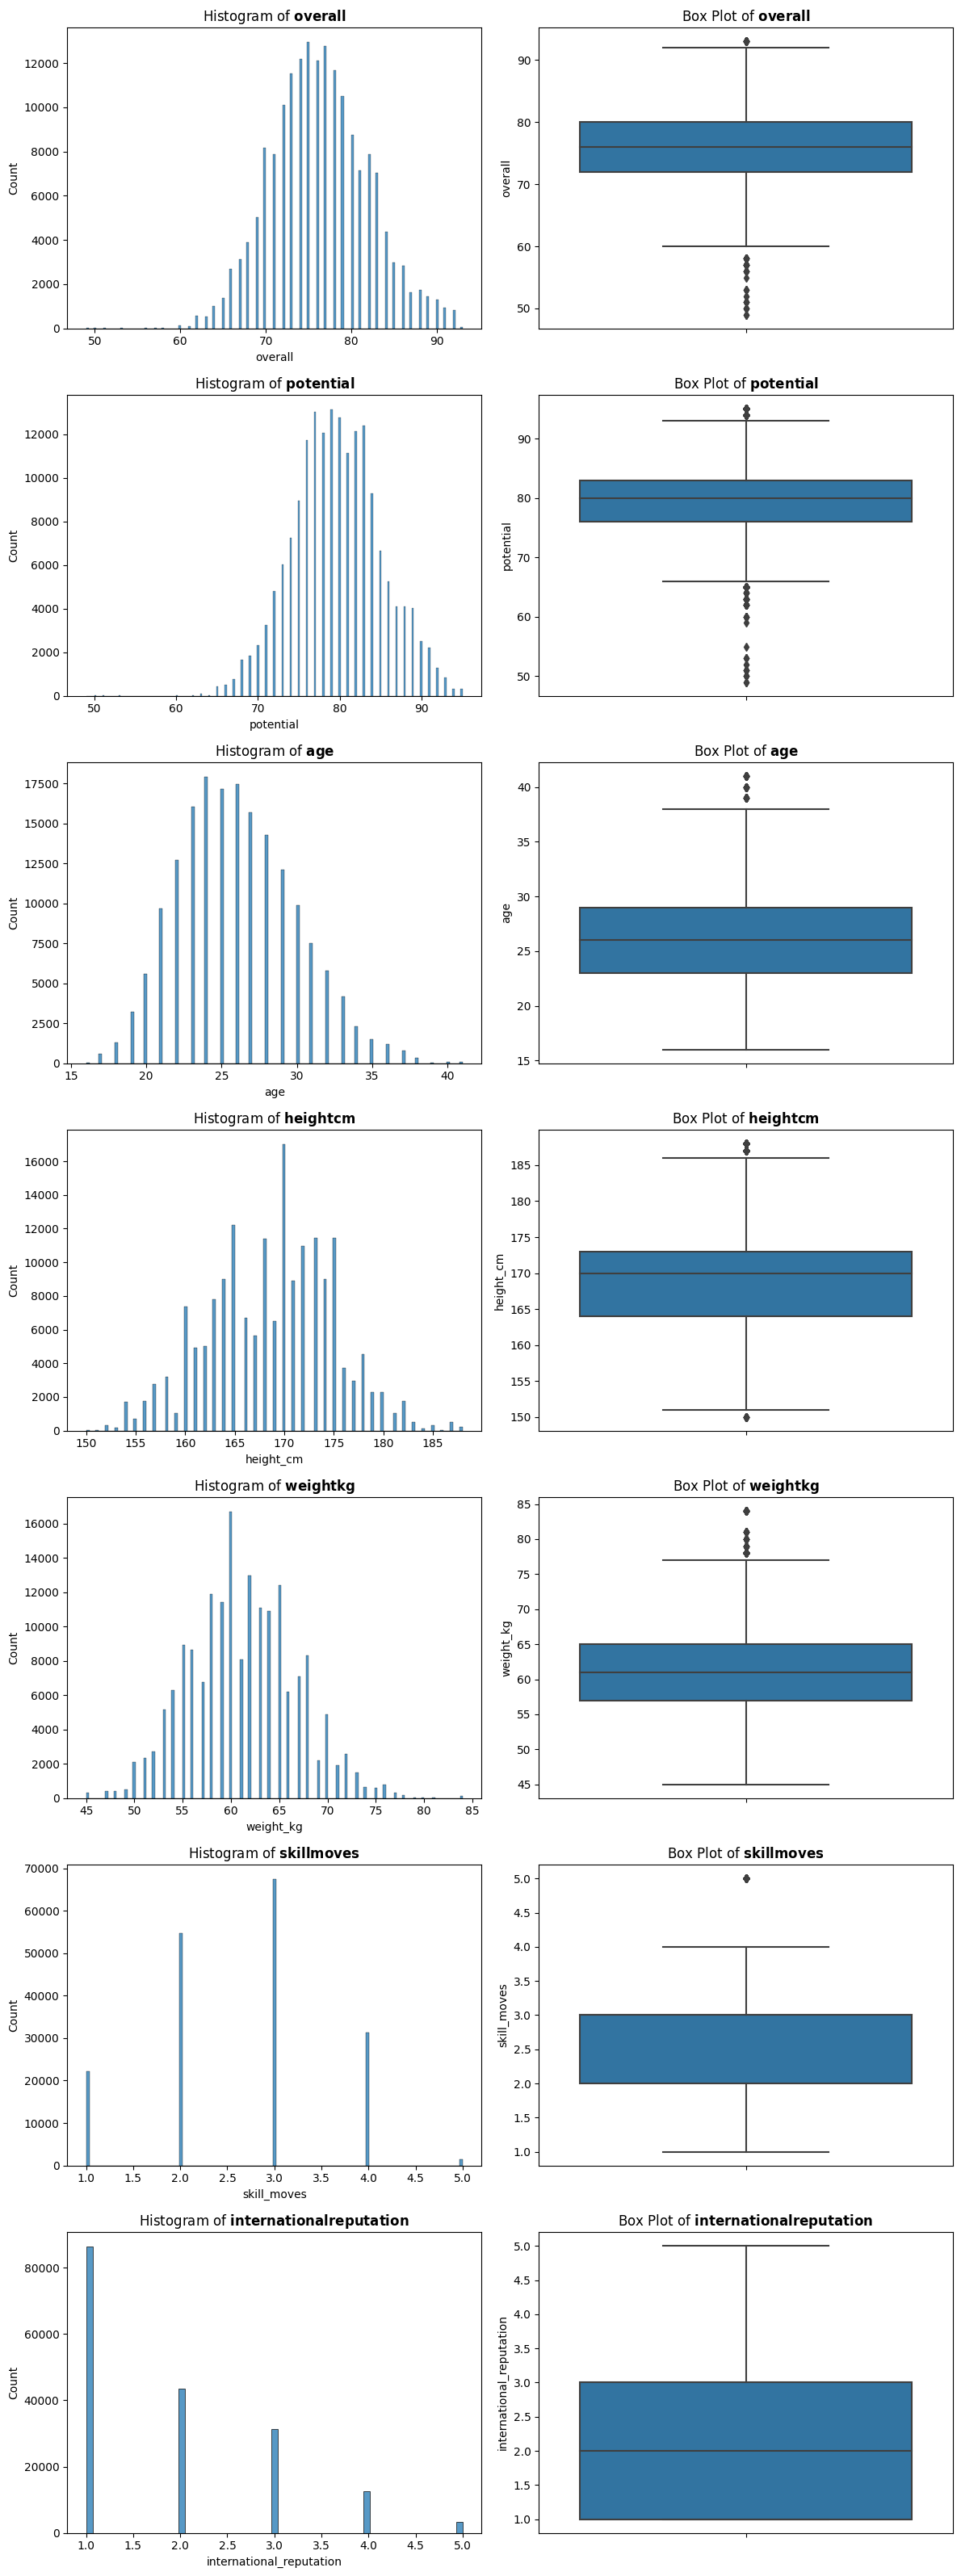

In [5]:
# sns.set_palette('deep')     # Reset the color palette to default
try:
    numerical_col = ['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'skill_moves', 'international_reputation']

    fig, axes = plt.subplots(nrows=len(numerical_col), ncols=2, figsize=(12, 32))
    fig.subplots_adjust(hspace=0.5)

    # distribution of player demographics features
    for i, col in enumerate(numerical_col):
        sns.histplot(data=df, x=col, ax=axes[i, 0])
        sns.boxplot(data=df, y=col, ax=axes[i, 1])
        # replace _ in column name with space
        col = col.replace('_', ' ')
        axes[i, 0].set_title(r'Histogram of $\bf{' + col + '}$')
        axes[i, 1].set_title(r'Box Plot of $\bf{' + col + '}$')
except:
    # clear figure
    plt.clf()
    numerical_col = ['overall', 'potential', 'age', 'height_cm', 'weight_kg', 'skill_moves', 'international_reputation']

    fig, axes = plt.subplots(nrows=len(numerical_col), ncols=2, figsize=(12, 32))
    fig.subplots_adjust(hspace=0.5)

    # distribution of player demographics features
    for i, col in enumerate(numerical_col):
        sns.histplot(data=df, x=col, ax=axes[i, 0])
        sns.boxplot(data=df, y=col, ax=axes[i, 1])
        # replace _ in column name with space
        col = col.replace('_', ' ')
        axes[i, 0].set_title(r'Histogram of $\bf{' + col + '}$')
        axes[i, 1].set_title(r'Box Plot of $\bf{' + col + '}$')
plt.tight_layout()
plt.show()

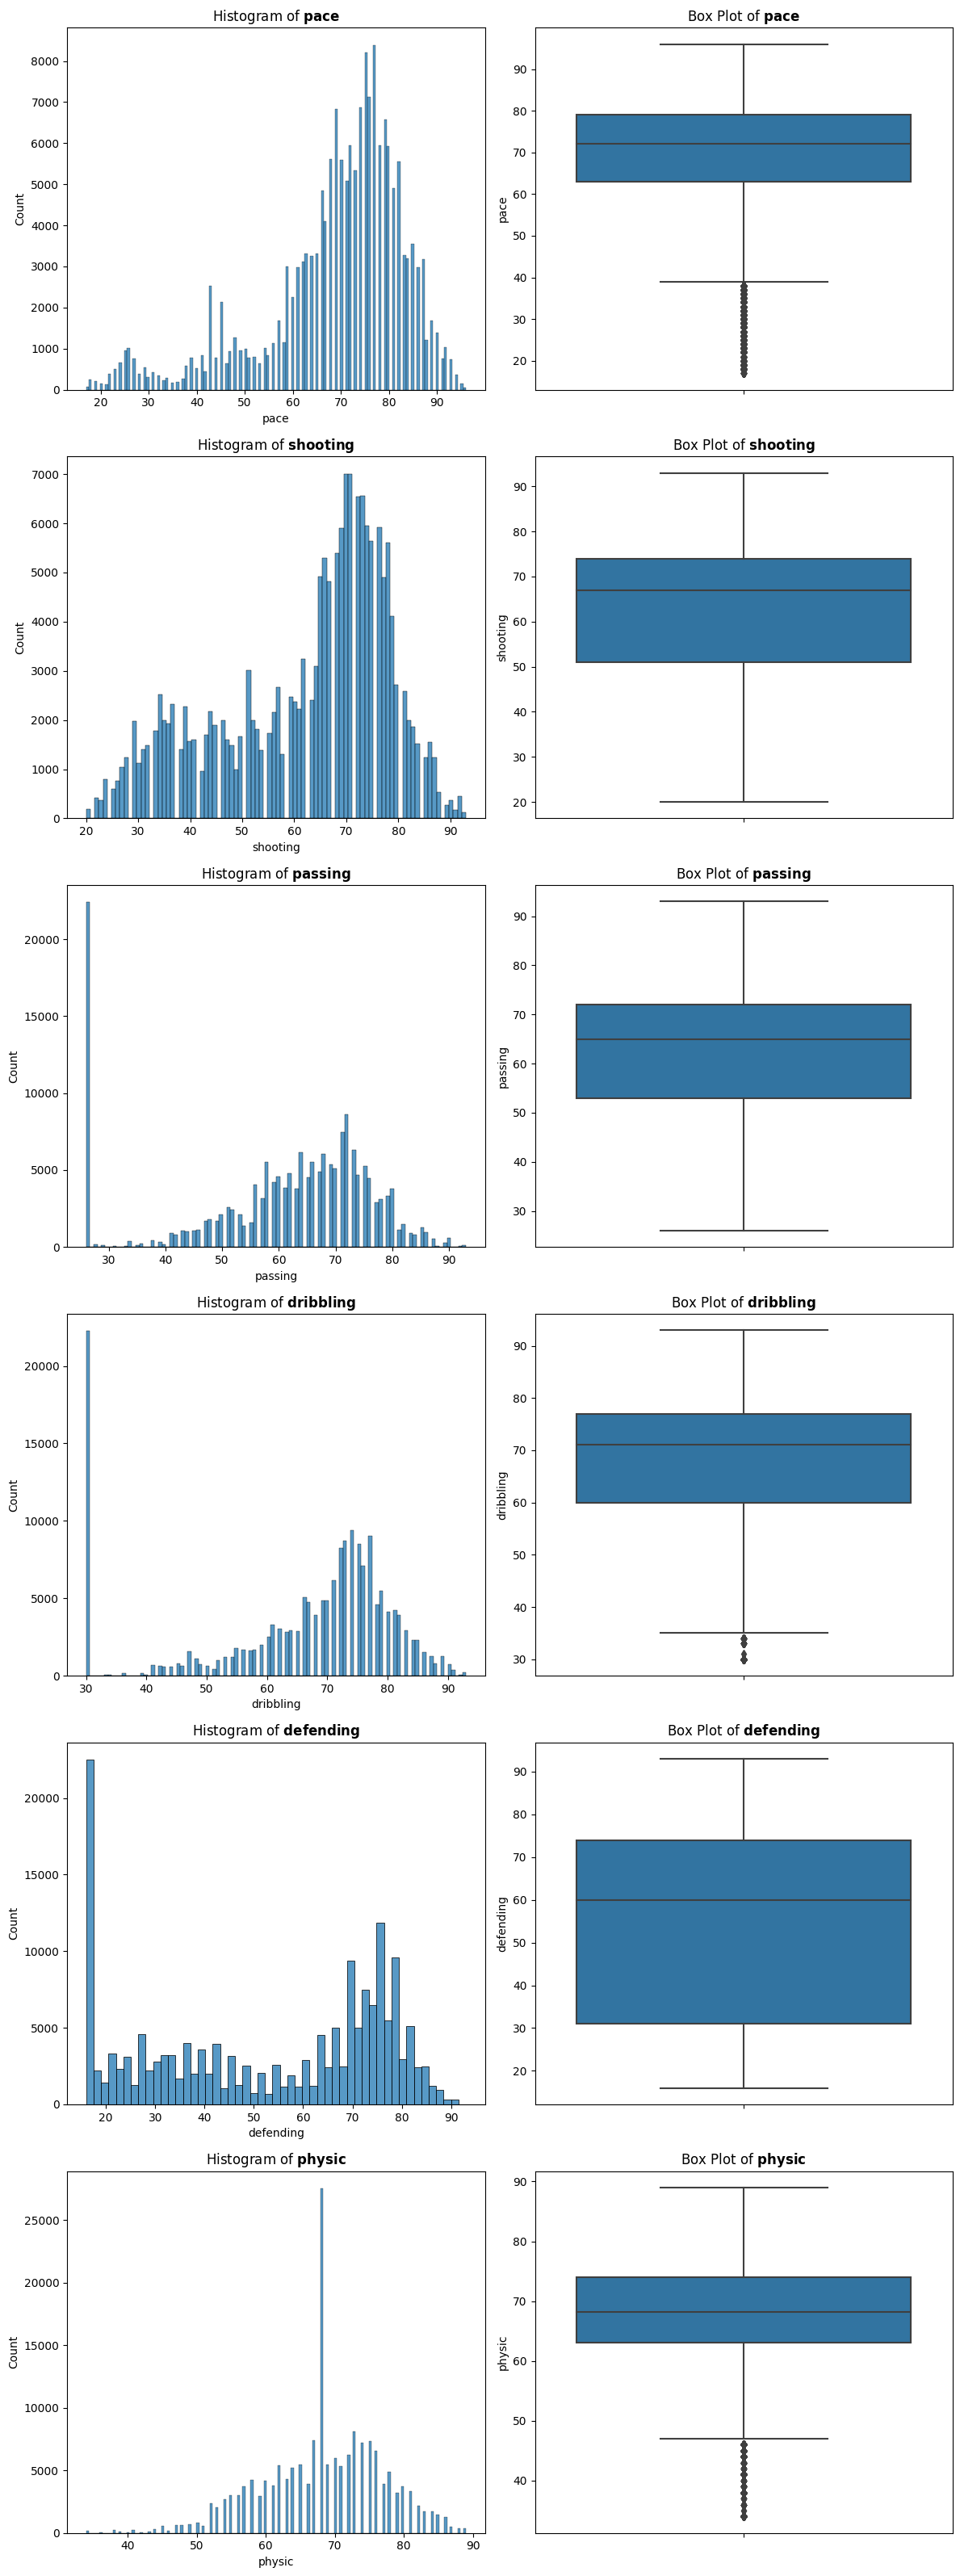

In [6]:
stats = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

fig, axes = plt.subplots(nrows=len(stats), ncols=2, figsize=(12, 32))
fig.subplots_adjust(hspace=0.5)

# distribution of player demographics features
for i, col in enumerate(stats):
    sns.histplot(data=df, x=col, ax=axes[i, 0])
    sns.boxplot(data=df, y=col, ax=axes[i, 1])
    # replace _ in column name with space
    col = col.replace('_', ' ')
    axes[i, 0].set_title(r'Histogram of $\bf{' + col + '}$')
    axes[i, 1].set_title(r'Box Plot of $\bf{' + col + '}$')

plt.tight_layout()
plt.show()

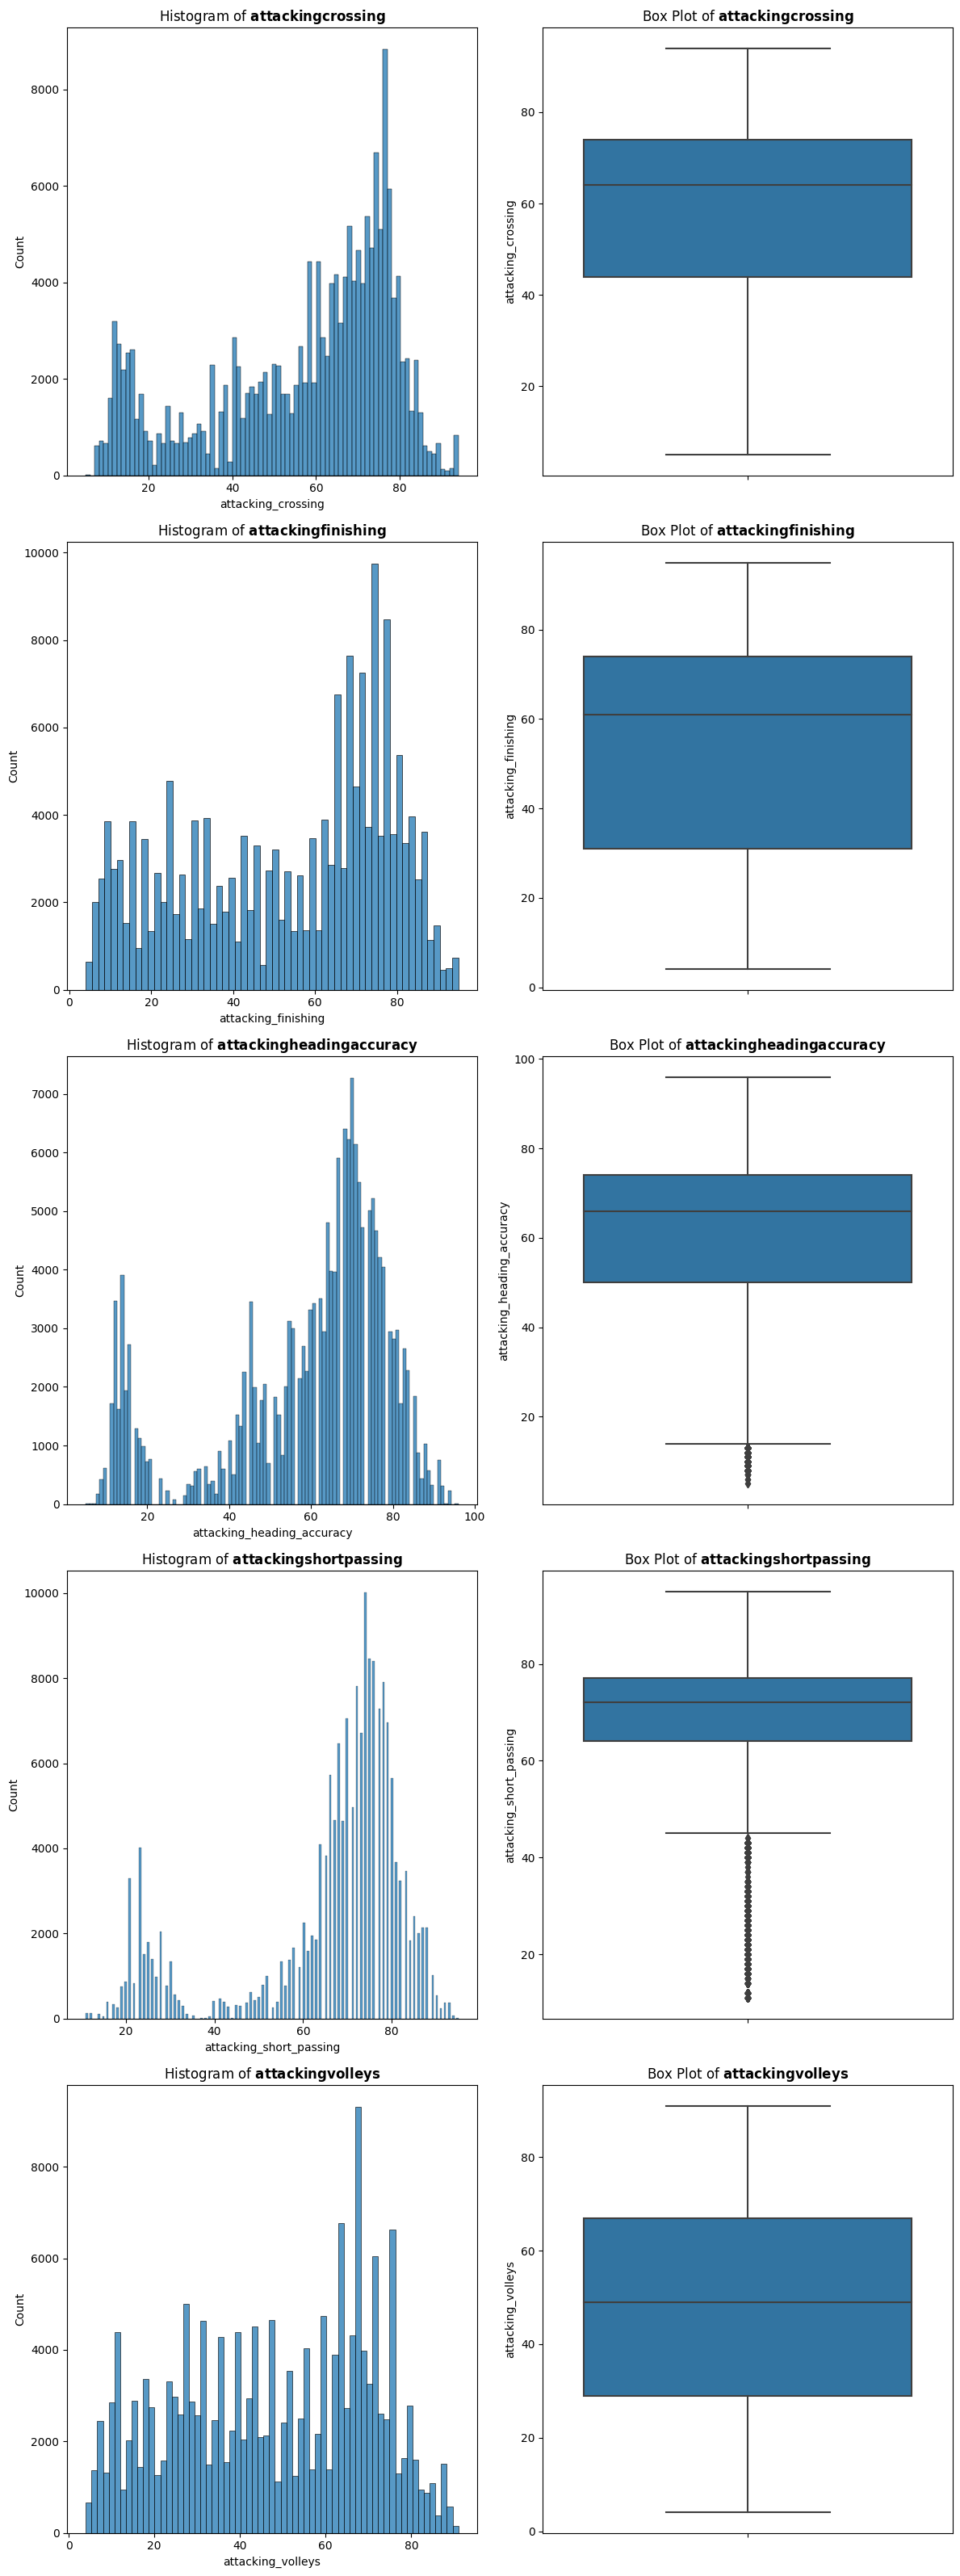

In [7]:
attacking = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys']

fig, axes = plt.subplots(nrows=len(attacking), ncols=2, figsize=(12, 32))
fig.subplots_adjust(hspace=0.5)

# distribution of player demographics features
for i, col in enumerate(attacking):
    sns.histplot(data=df, x=col, ax=axes[i, 0])
    sns.boxplot(data=df, y=col, ax=axes[i, 1])
    # replace _ in column name with space
    col = col.replace('_', ' ')
    axes[i, 0].set_title(r'Histogram of $\bf{' + col + '}$')
    axes[i, 1].set_title(r'Box Plot of $\bf{' + col + '}$')

plt.tight_layout()
plt.show()

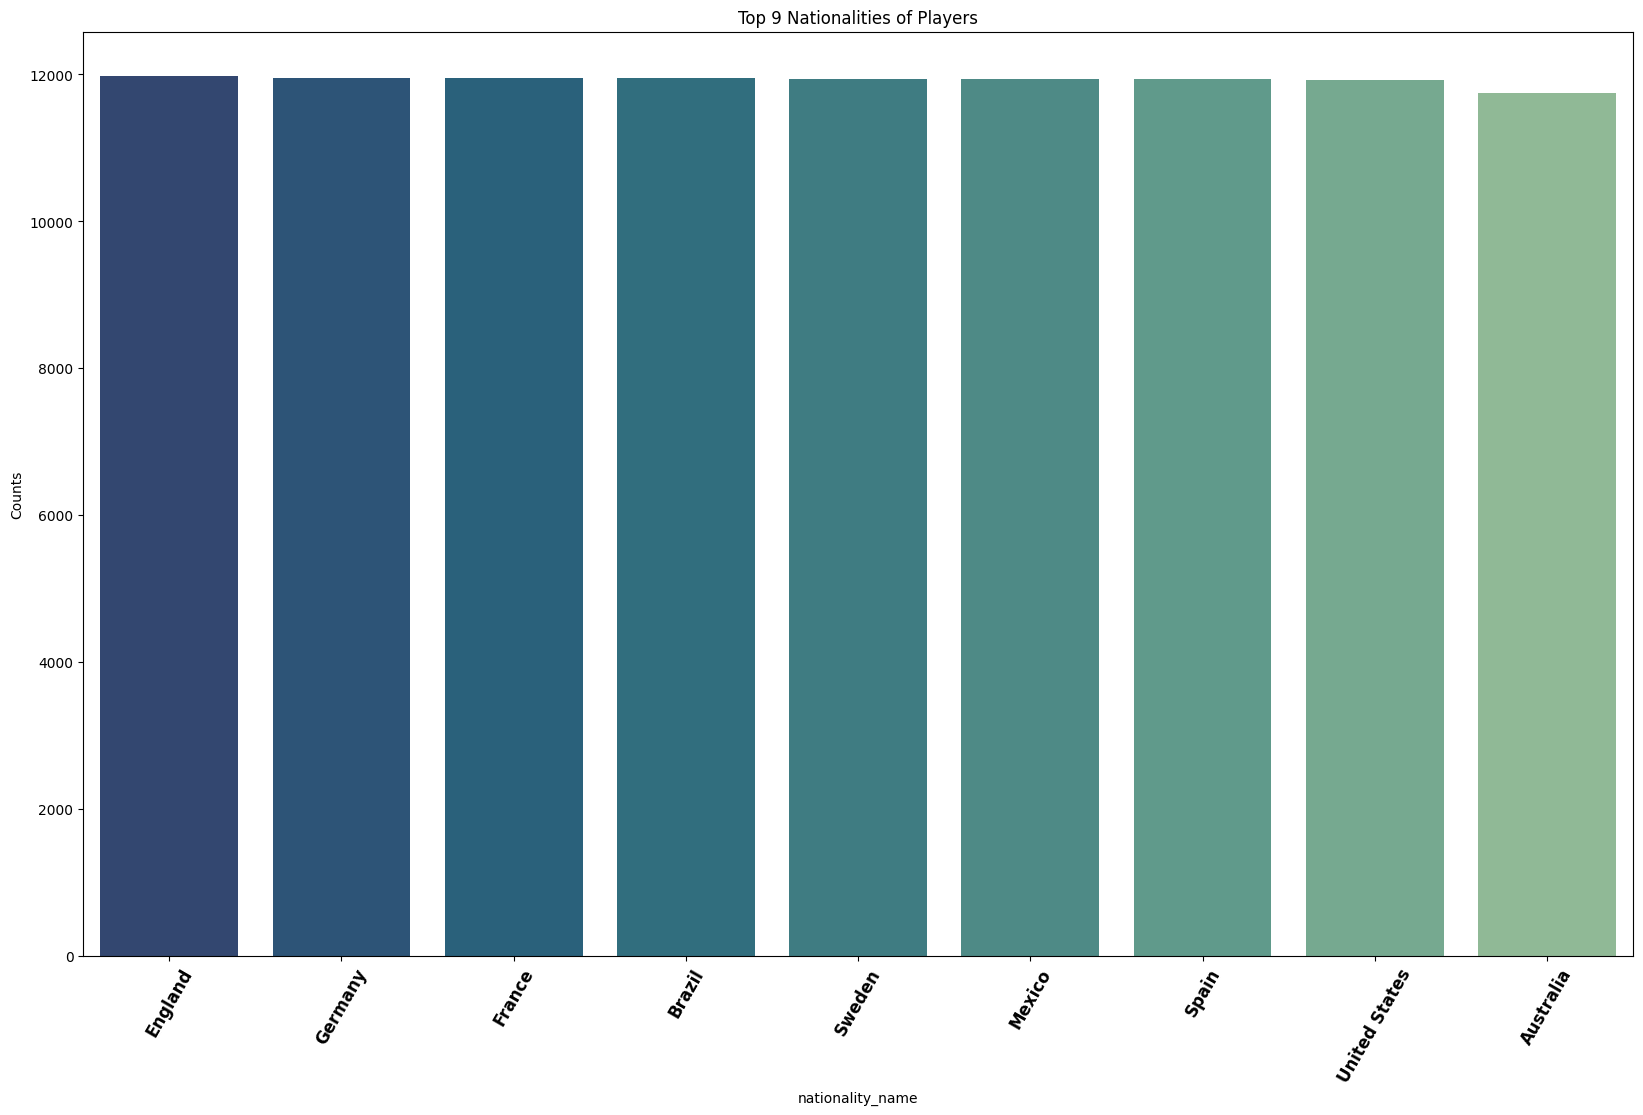

In [13]:
nationality_count = 15
if dataset == "female_players_23":
    nationality_count = 9

nat_cnt=df.groupby('nationality_name').apply(lambda x:x['short_name'].count()).reset_index(name='Counts')
nat_cnt.sort_values(by='Counts',ascending=False,inplace=True)
top_nat_cnt=nat_cnt[:nationality_count]
plt.figure(figsize=(20, 12))
sns.barplot(x='nationality_name', y='Counts', data=top_nat_cnt, palette='crest_r')
plt.title(f'Top {nationality_count} Nationalities of Players')
plt.xticks(rotation=60, weight = 'bold', fontsize = 12) 
plt.show()

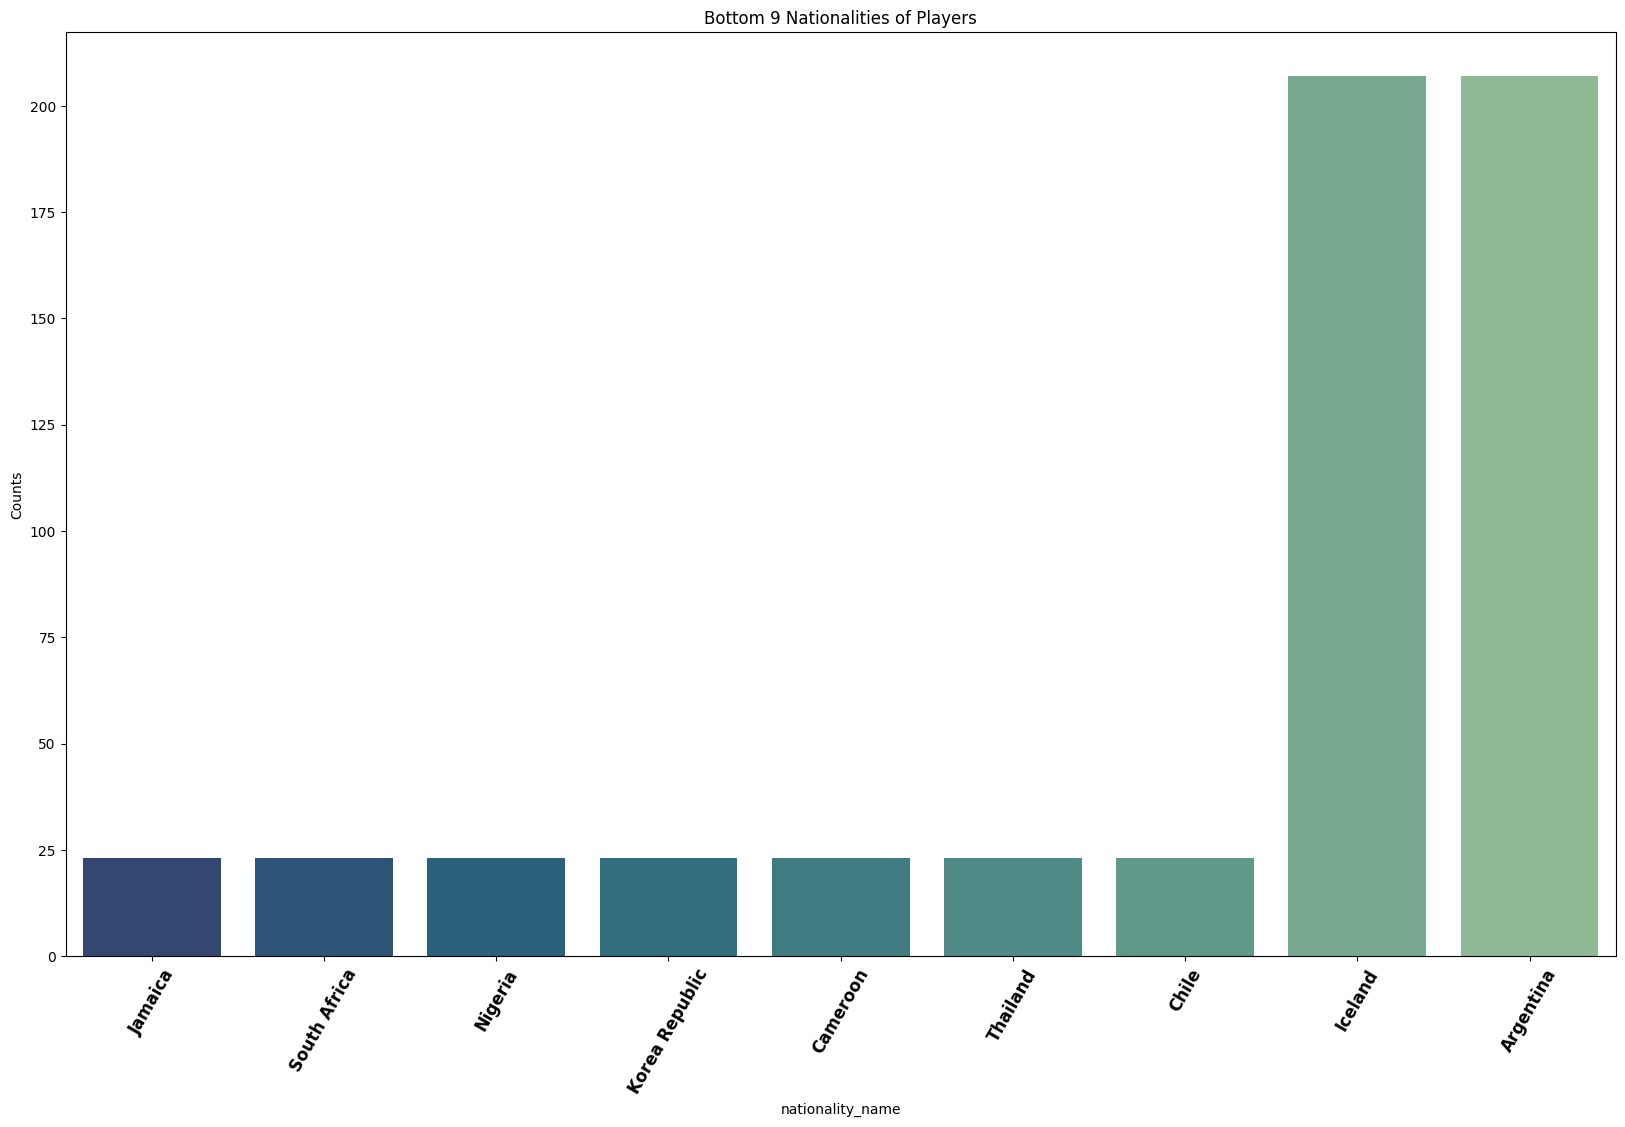

In [14]:
nat_cnt=df.groupby('nationality_name').apply(lambda x:x['short_name'].count()).reset_index(name='Counts')
nat_cnt.sort_values(by='Counts',ascending=True,inplace=True)
bottom_15_nat_cnt=nat_cnt[:nationality_count]
plt.figure(figsize=(20, 12))
sns.barplot(x='nationality_name', y='Counts', data=bottom_15_nat_cnt, palette='crest_r')
plt.title(f'Bottom {nationality_count} Nationalities of Players')
plt.xticks(rotation=60, weight = 'bold', fontsize = 12) 
plt.show()

# Some nations have too few players, this could be increased by taking the full national team

In [15]:
# number of players in Egypt
(df['nationality_name'] == 'Egypt').sum()

0

In [17]:
try:
    # count unique values in club_name
    len(df['club_name'].unique())
except:
    print("No club_name column in females")

No club_name column in females


In [19]:
try:
    club_count=df.groupby('club_name').apply(lambda x:x['short_name'].count()).reset_index(name='Counts')
    club_count.sort_values(by='Counts',ascending=False,inplace=True)
    top_35_clubs=club_count[:35]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='club_name', y='Counts', data=top_35_clubs, hue='Counts', palette='crest_r')
    plt.title('Clubwise Player counts in FIFA 21')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()
    # fig.show()
except:
    print("No club_name column in females")

No club_name column in females


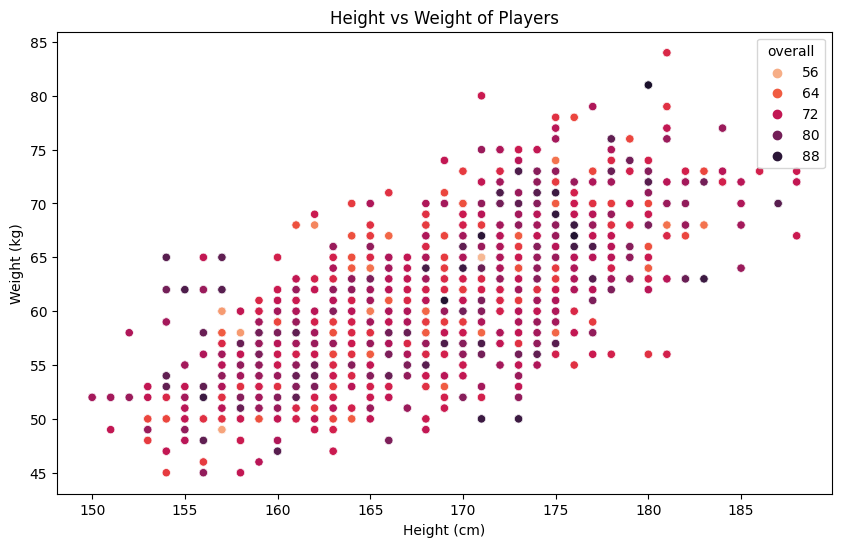

In [20]:
# make a scatter plot of height vs weight
plt.figure(figsize=(10, 6))
sns.scatterplot(x='height_cm', y='weight_kg', data=df, palette='rocket_r', hue= 'overall')
plt.title('Height vs Weight of Players')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

# We notice that the overall rating is higher for people on the edges of the plot

In [ ]:
# # No useful information can be extracted from the plot
# # plot overall vs weight divided by height
# df['weight_by_height'] = df['weight_kg'] / df['height_cm']
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='overall', y='weight_by_height', data=df, palette='rocket_r')
# plt.title('Overall Rating vs Weight by Height')
# plt.xlabel('Overall Rating')
# plt.ylabel('Weight by Height')
# plt.show()

# # drop the column
# df = df.drop(columns = ['weight_by_height'])

In [21]:
df['weak_foot'].value_counts()

weak_foot
3    110198
2     32978
4     26982
5      5462
1      1737
Name: count, dtype: int64

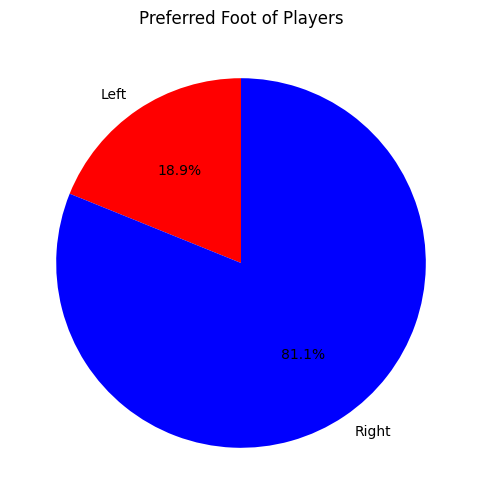

In [22]:
plt.figure(figsize=(10, 6))

# Create a dictionary to map the values
foot_dict = {0: 'Left', 1: 'Right'}
df['preferred_foot_text'] = df['preferred_foot'].map(foot_dict)

labels = ['Left', 'Right']  # Specify the order of the labels here
df['preferred_foot_text'].value_counts()[labels].plot.pie(autopct='%1.1f%%', colors=['#FF0000','#0000FF'], startangle=90, labels=labels)

plt.title('Preferred Foot of Players')
plt.ylabel('')
plt.show()

# drop the column
df = df.drop(columns = ['preferred_foot_text'])

In [23]:
# strikers: ls, st, rs, lf, cf, rf
# midfielders:  lam, cam, ram, lm, lcm, cm, rcm, rm, ldm, cdm, rdm
# wingers: lw, rw
# back: lwb, rwb, lb, lcb, cb, rcb, rb
# goalkeepers: gk
strikers = ['ls', 'st', 'rs', 'lf', 'cf', 'rf']
midfielders = ['lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'ldm', 'cdm', 'rdm']
wingers = ['lw', 'rw']
defenders = ['lwb', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
goalkeepers = ['gk']

In [24]:
df['club_position'].value_counts()
strikers = ['ls', 'st', 'rs', 'lf', 'cf', 'rf']
midfielders = ['lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'ldm', 'cdm', 'rdm']
wingers = ['lw', 'rw']
defenders = ['lwb', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
goalkeepers = ['gk']

# make a new column for the position of the player
df['position'] = 'Reserved'
df.loc[df['club_position'].str.lower().isin(strikers), 'position'] = 'Striker'
df.loc[df['club_position'].str.lower().isin(midfielders), 'position'] = 'Midfielder'
df.loc[df['club_position'].str.lower().isin(wingers), 'position'] = 'Winger'
df.loc[df['club_position'].str.lower().isin(defenders), 'position'] = 'Defender'
df.loc[df['club_position'].str.lower().isin(goalkeepers), 'position'] = 'Goalkeeper'

KeyError: 'club_position'

In [ ]:
# plot density function for club position against overall
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['position'] != 'Reserved'], x='international_reputation', hue='position')
plt.title('Density Plot of International Reputation by Position')
plt.xlabel('Overall Rating')
plt.ylabel('Density')
plt.show()


In [ ]:
df['international_reputation'].value_counts()

In [ ]:
famous_teams = df.groupby('club_name')['international_reputation'].mean().reset_index(name='mean_reputation')
famous_teams.sort_values(by='mean_reputation',ascending=False,inplace=True)
top_15=famous_teams[:15]
plt.figure(figsize=(20, 12))
sns.barplot(x='club_name', y='mean_reputation', data=top_15, palette='crest_r')
plt.title('Top 15 Clubs with International Reputation')
plt.xticks(rotation=60, weight = 'bold', fontsize = 12) 
plt.show()


# TODO: n3ml mokarna ma bein teamein, aw nafs el team 3la sanatein

In [ ]:
# group by el team, b3dein el la3eeba where position asasy
# striker: finishing, strength, short_passing, agility, dribbling, balance, acceleration, sprint_speed
# midfielder: short_passing, long_passing, ball_control, dribbling, balance, agility, stamina
# winger: crossing, dribbling, ball_control, acceleration, sprint_speed, agility
# defender: defending, heading, standing_tackle, sliding_tackle, interceptions, marking, strength
# goalkeeper: gk_diving, gk_handling, gk_kicking, gk_positioning, gk_reflexes

team_name = 'Real Madrid'
df_team = df[df['club_name'] == team_name]
df_team = df_team[df_team['position'] != 'Reserved']
df_team['position'].value_counts()

In [ ]:
# Striker
# attacking = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys']
# striker: finishing, strength, short_passing, agility, dribbling, balance, acceleration, sprint_speed
strikers = df_team[df_team['position'] == 'Striker']


proportions = np.array([strikers['attacking_finishing'].mean(), strikers['power_strength'].mean(), strikers['attacking_short_passing'].mean(),
               strikers['movement_agility'].mean(), strikers['dribbling'].mean(), strikers['movement_balance'].mean(),
                strikers['movement_acceleration'].mean(), strikers['movement_sprint_speed'].mean()]) / 100
labels = ["finishing", "strength", "short_passing", "agility", "dribbling", "balance", "acceleration", "sprint_speed"]     # dyh el skills nafsaha


N = len(proportions)
proportions = np.append(proportions, 1)
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
x = np.append(np.sin(theta), 0)
y = np.append(np.cos(theta), 0)
triangles = [[N, i, (i + 1) % N] for i in range(N)]
triang_backgr = tri.Triangulation(x, y, triangles)
triang_foregr = tri.Triangulation(x * proportions, y * proportions, triangles)
cmap = plt.cm.rainbow_r  # or plt.cm.hsv ?
colors = np.linspace(0, 1, N + 1)
plt.tripcolor(triang_backgr, colors, cmap=cmap, shading='gouraud', alpha=0.4)
plt.tripcolor(triang_foregr, colors, cmap=cmap, shading='gouraud', alpha=0.8)
plt.triplot(triang_backgr, color='white', lw=2)
for label, color, xi, yi in zip(labels, colors, x, y):
    plt.text(xi * 1.05, yi * 1.05, label,  # color=cmap(color),
             ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
             va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center')
plt.axis('off')
plt.gca().set_aspect('equal')
plt.title(team_name + ' Strikers', weight = 'bold')
plt.show()
